#**Egade Business School**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###**Equipo 1**
####A00154781 Ana Maria Zermeño Padilla
####A01451418 Juanita Mabel Alvarez Villanueva
####A01101881 Manuel Alejandro Padilla
####A01451399 Juan Antonio Gonzalez Cazarez
####A01451407 José César Méndez Hernández
####A00588373 Javier Alvarez Pereyra

# Riesgo Crediticio.

En esta tarea se evaluará el riesgo crediticio del dataset South German Credit de la página UCI, con el objetivo de minimizar el riesgo en la asignación de créditos.



In [ ]:
## Librerías

import pandas as pd
import scipy as sc
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,f1_score, recall_score,accuracy_score,RocCurveDisplay,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
 

In [ ]:
# Cargar data set

#data = pd.read_csv('/content/SouthGermanCredit.csv')

from google.colab import drive
drive.mount('/content/drive')
mypath = "/content/drive/My Drive/Colab Notebooks/DataSamples/SouthGermanCredit.csv"
data = pd.read_csv(mypath)


Mounted at /content/drive


In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
  1# Volver categórico

status = {1:'<0 DM', 2:'0-200 DM', 3:'>200 DM',4:'no checking account'}
data['status'] = data['status'].map(status)

credit_history = {0 : 'no credits taken/all credits paid back duly',       
 1 : 'all credits at this bank paid back duly',   
 2 : 'existing credits paid back duly till now',
 3 : 'delay in paying off in the past',
 4 : 'critical account'}
data['credit_history'] = data['credit_history'].map(credit_history)

#purpose = {0 : 'car (new)', 1 : 'car (used)',2 : 'furniture/equipment', 3 : 'radio/television', 
#           4 : 'domestic appliances', 5 : 'repairs', 6 : 'education', 7 : 'vacation', 8 : 'retraining', 9 : 'business', 10 : 'others'}
#data['purpose'] = data['purpose'].map(purpose)

#savings = {1 :'<100 DM', 2:'100-500 DM', 3 :'500-1000 DM', 4:'>=1000 DM', 5:'unknown/no savings account'}
#data['savings'] = data['savings'].map(savings)

employment_duration = {1 : 'unemployed',2 : '<1 year', 3 : '1-3 years', 4 : '4-6 years', 5 : '>=7 years'}
data['employment_duration'] = data['employment_duration'].map(employment_duration)

installment_rate = {1 : '>=35', 2 : '25-35', 3 : '20-25', 4 : '<20'}
data['installment_rate'] = data['installment_rate'].map(installment_rate)

#personal_status_sex = {1 : 'male : divorced/separated', 2 : 'female : non-single or male : single', 3 : 'male : married/widowed', 4 : 'female : single'}
#data['personal_status_sex'] = data['personal_status_sex'].map(personal_status_sex)

#other_debtors = {1 : 'none', 2 : 'co-applicant', 3 : 'guarantor'}
#data['other_debtors'] = data['other_debtors'].map(other_debtors)

#present_residence = {1 : '<1 year', 2 : '1-4 years', 3 : '4-7 yers', 4 : '>=7 years'}
#data['present_residence'] = data['present_residence'].map(present_residence)

#property = {4 : 'unknown/no property', 3 : 'car or other',2 : 'building soc. savings agr./life insurance', 1 : 'real estate'}
#data['property'] = data['property'].map(property)

#other_installment_options = {1 : 'bank',2 : 'stores',3 : 'none'}
#data['other_installment_plans'] = data['other_installment_plans'].map(other_installment_options)

#housing = {3:'for free', 1:'rent', 2:'own'} 
#data['housing'] = data['housing'].map(housing)

#job={1 : 'unemployed/unskilled - non-resident',2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'}
#data['job'] = data['job'].map(job)

#telephone = {1 : 'no',2 : 'yes'}
#data['telephone'] = data['telephone'].map(telephone)

#foreign_worker = {1 : 'yes', 2 : 'no'}
#data['foreign_worker'] = data['foreign_worker'].map(foreign_worker)

In [ ]:
data

###Parte I: Partición, análisis y pre-procesamiento de los datos.


---



In [ ]:
X = data[['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker']]
Y = data['credit_risk']

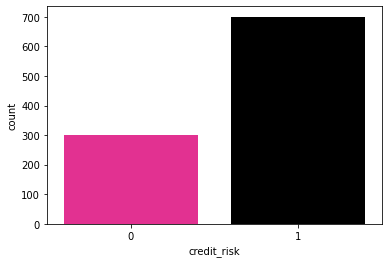

In [ ]:
sns.countplot(x='credit_risk', palette=['deeppink','black'],data=data)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(700, 20)
(300, 20)
(700,)
(300,)


### Exploración y limpieza de datos


---

Realiza un análisis descriptivo sobre el conjunto de datos y lleva a cabo las técnicas de pre- procesamiento que consideres más adecuadas. Justifica y documenta las decisiones tomadas. En particular indica qué decisiones tomaste en cada uno de los siguientes puntos, los cuales menciono en orden arbitrario y además no necesariamente implica que tienes que aplicar dichas técnicas.

a) Datos perdidos

In [ ]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Como observamos, en el dataset no existe ningún dato perdido, por lo que no hay necesidad de realizar algo adicional en este punto.

b) Histogramas, diagramas de caja.

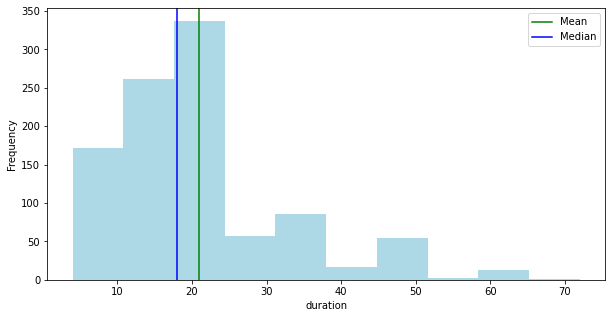

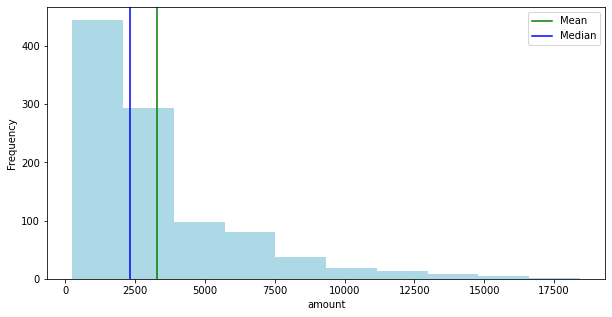

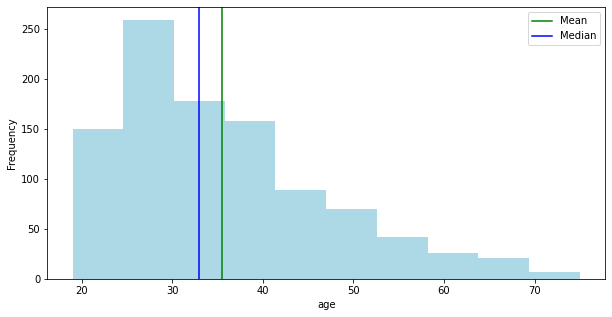

In [ ]:
for columns in  ['duration','amount','age']:
    mean_val = X[columns].mean()
    median_val = X[columns].median()
    mode_val = X[columns].mode()

  

    plt.figure(figsize=(10,5)) # set the figure size
    plt.hist(X[columns],color='lightblue') #Plot the histogram
    
    
    plt.axvline(mean_val, color='green',label='Mean')     # Draw lines on the plot for mean median mode
    plt.axvline(median_val, color='blue',label='Median')

    plt.xlabel(columns)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis
    plt.legend()              # Plot the legend
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

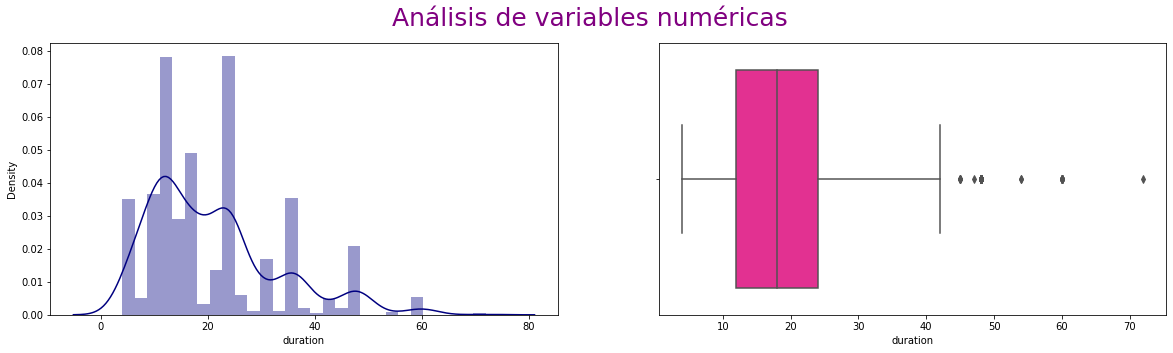

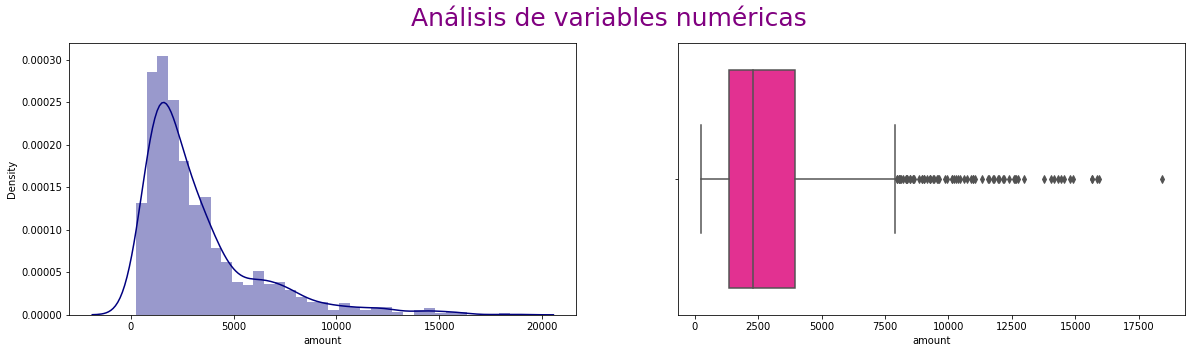

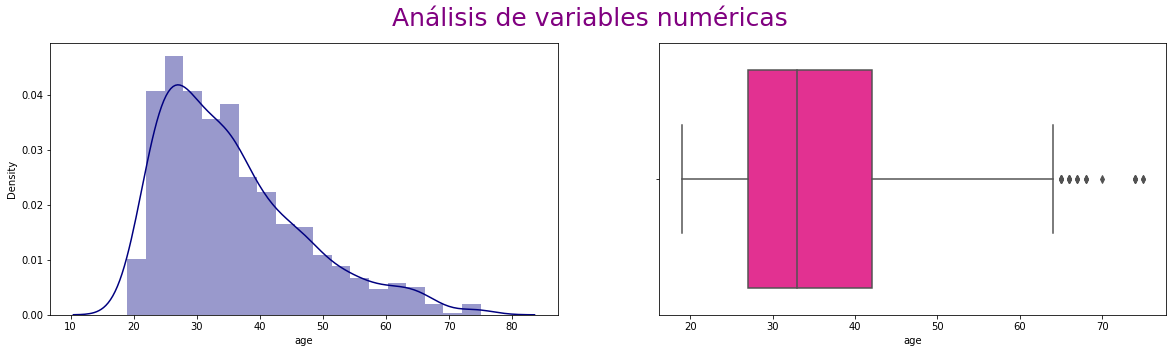

In [ ]:
# Variables numéricas
for columns in  ['duration','amount','age']:

    fig,ax=plt.subplots(1,2,figsize=(20,5))
    fig.suptitle('Análisis de variables numéricas', fontsize=25, color="purple")
    sns.distplot(X[columns],ax=ax[0], color="navy")
    sns.boxplot(X[columns],ax=ax[1], color="deeppink")

In [ ]:
coln = X[['duration','amount','age']]
coln.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


Como observamos en la gráfica y descripción, están sesgadas hacia la derecha, por lo que procederemos a aplicarles logaritmos para normalizar

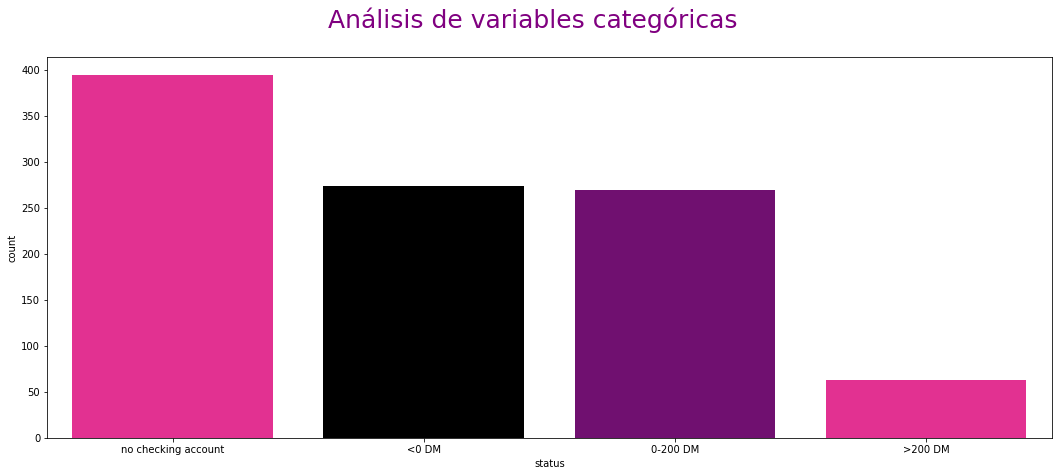

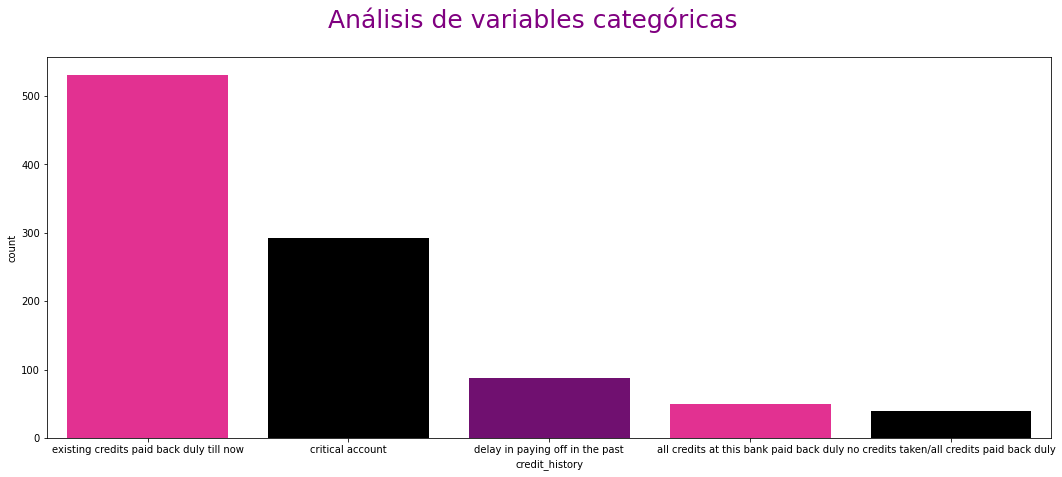

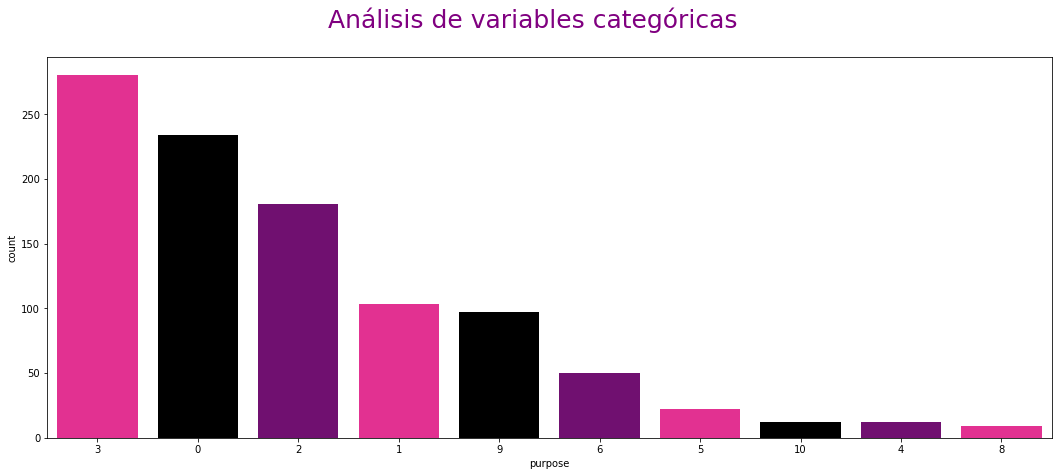

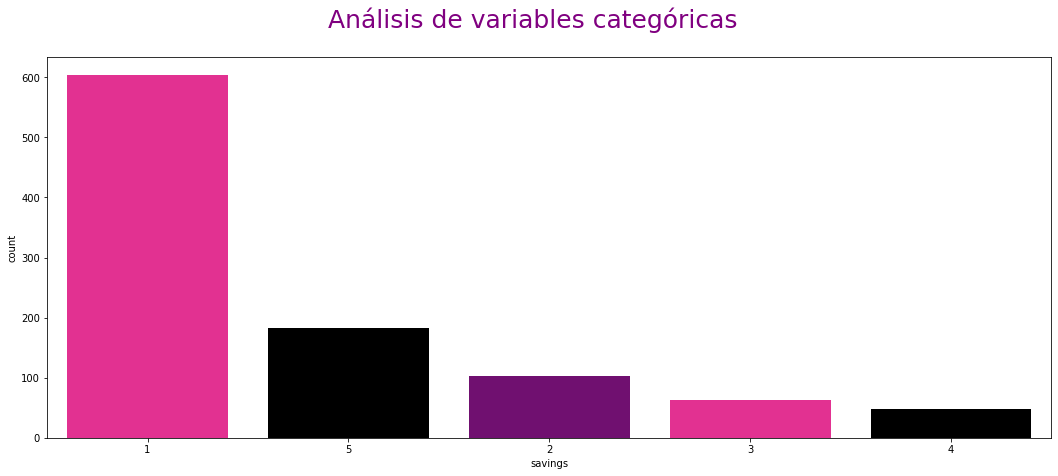

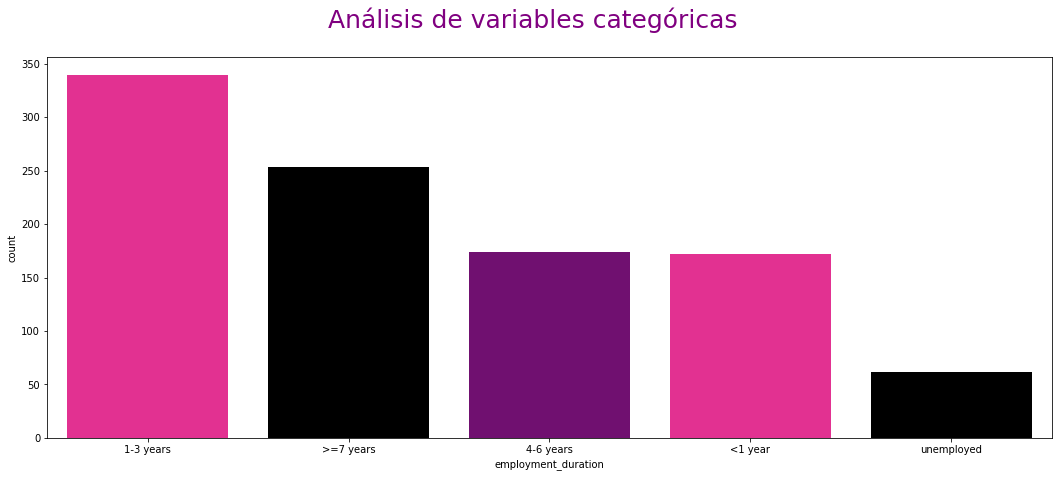

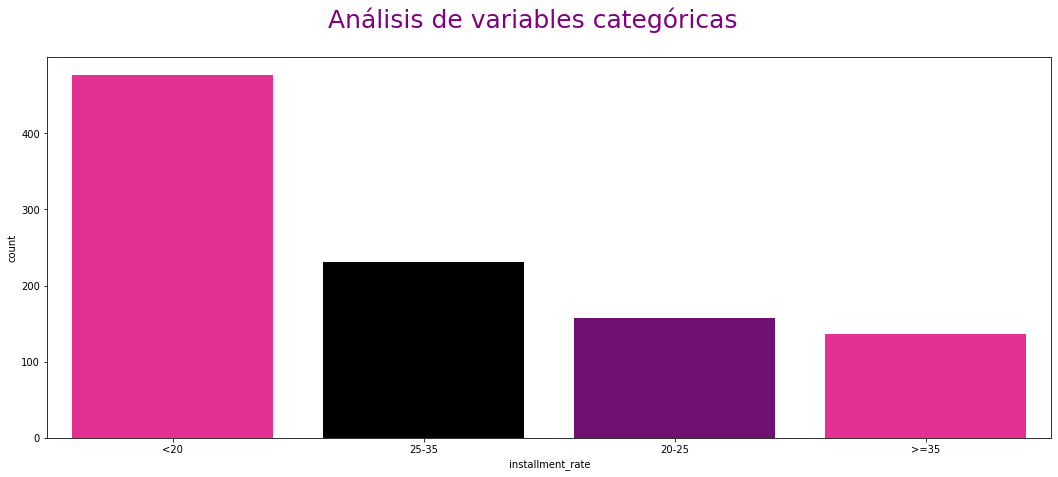

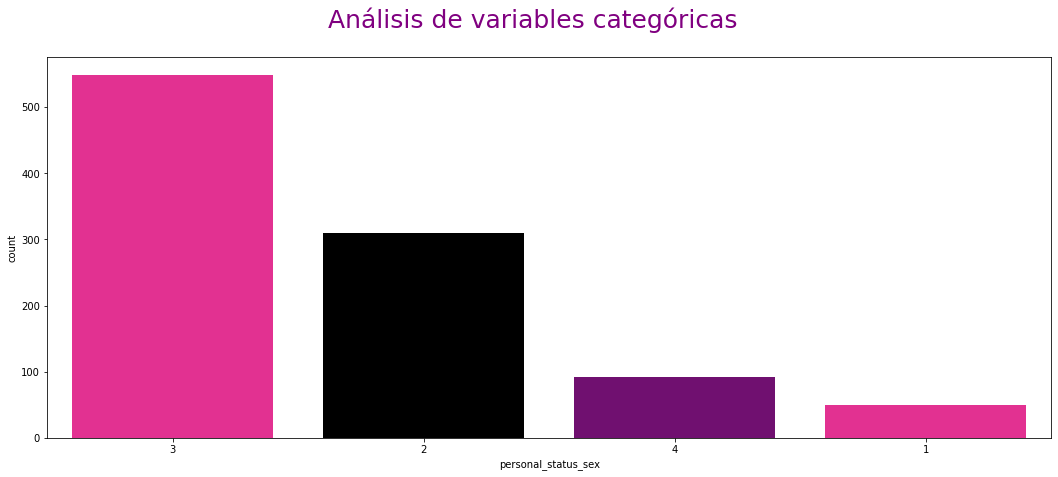

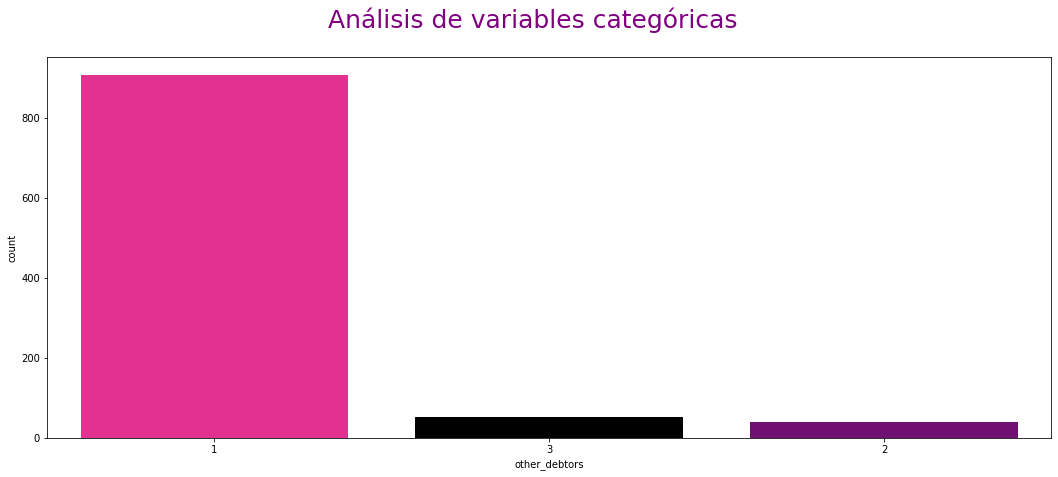

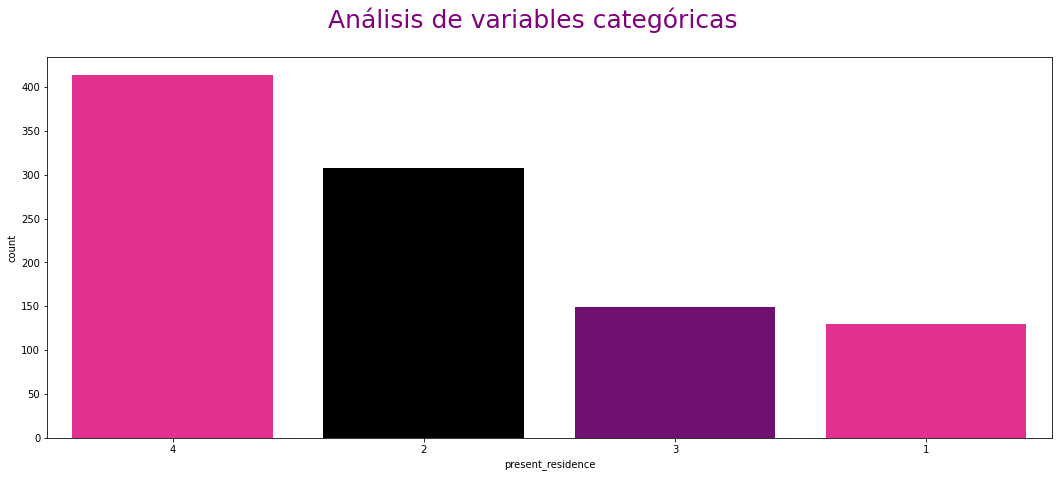

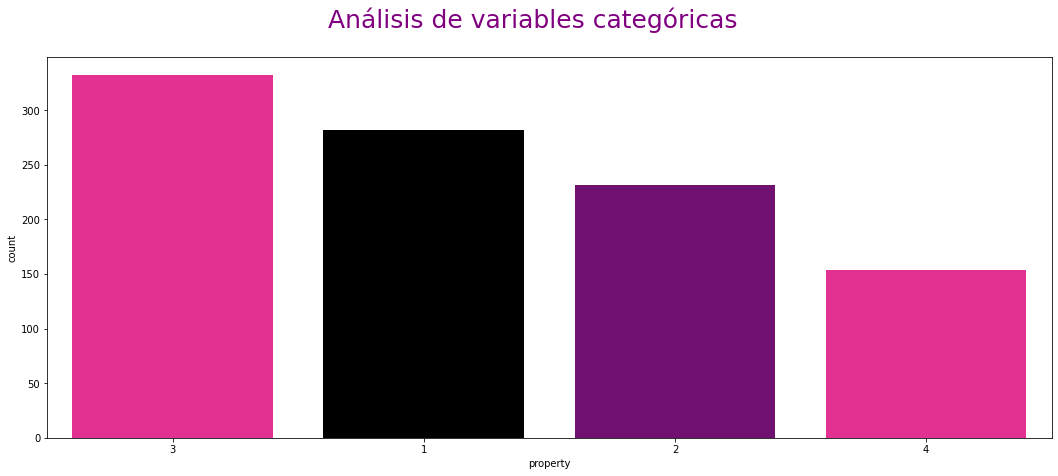

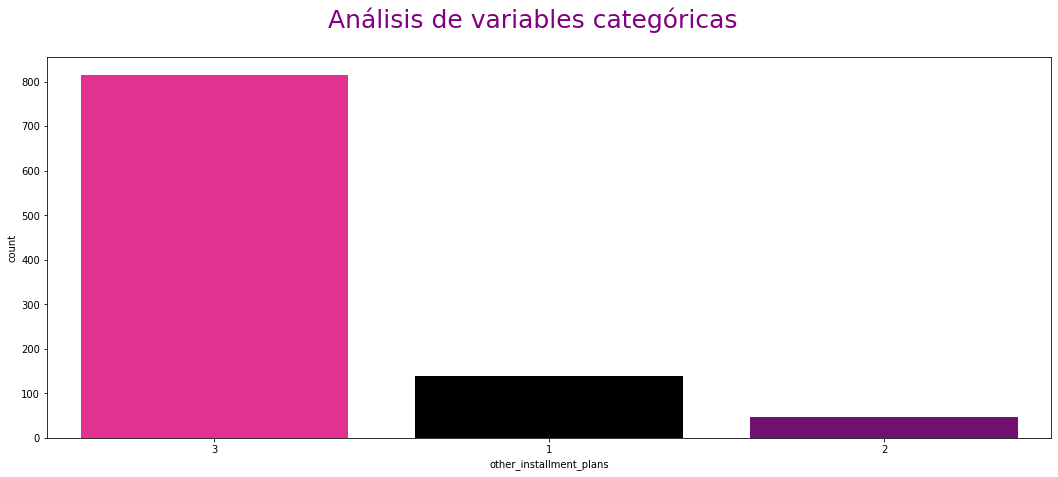

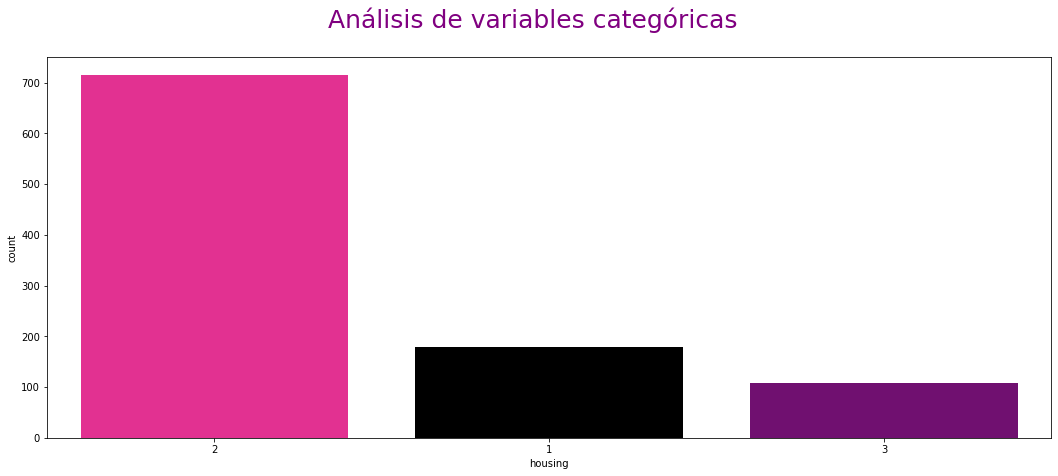

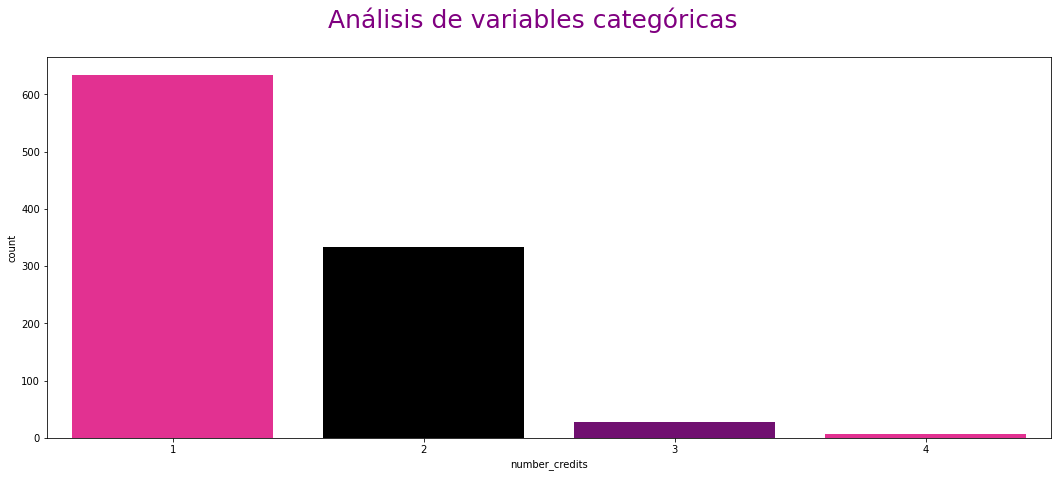

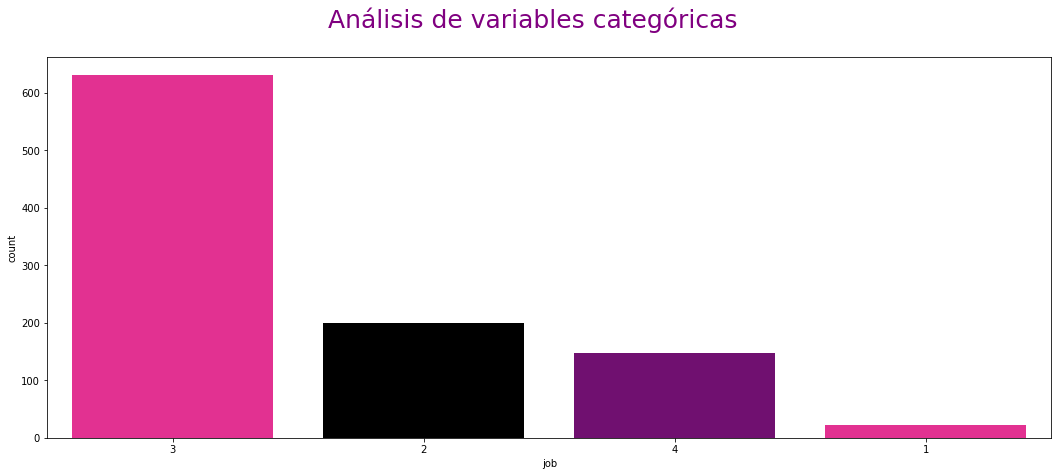

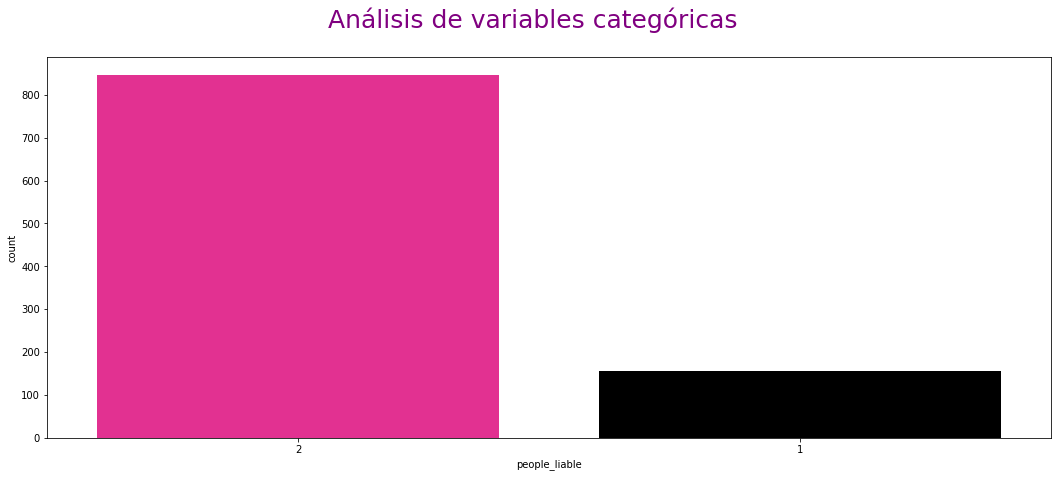

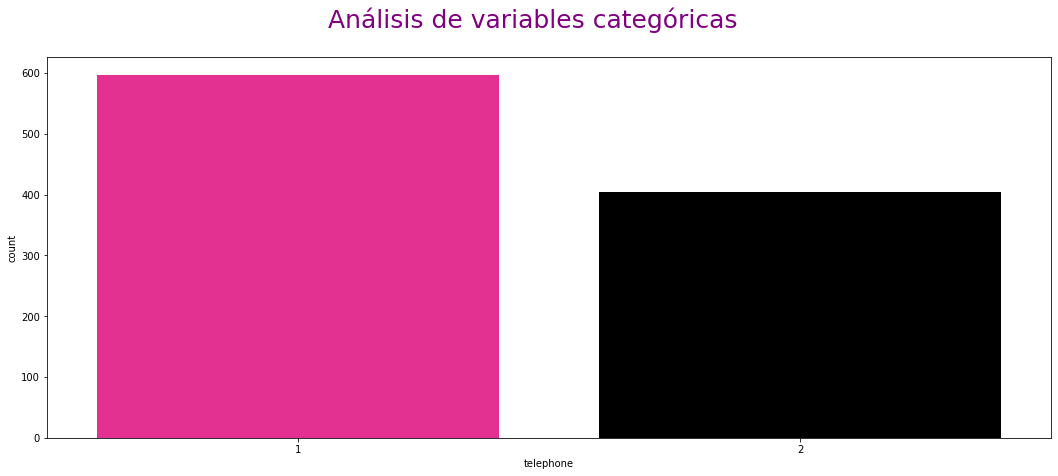

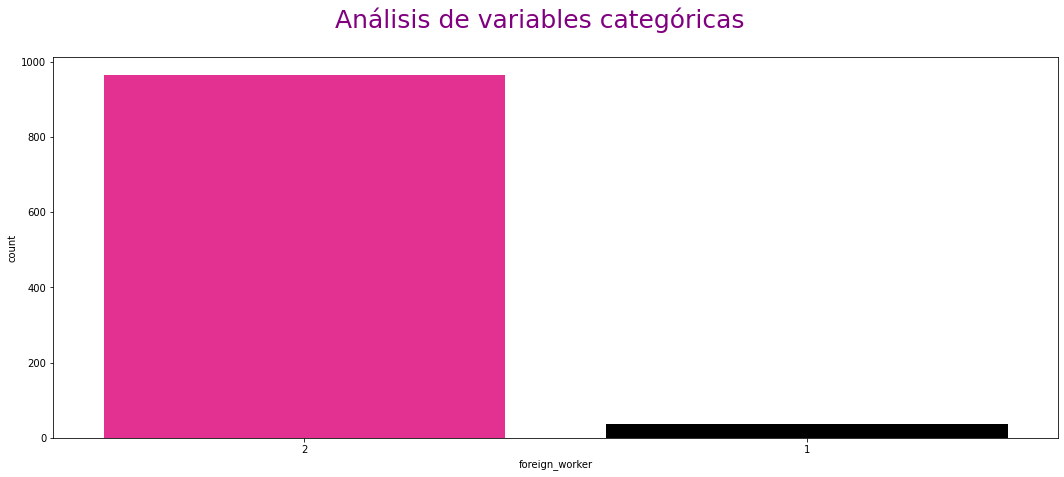

In [ ]:
from seaborn.palettes import color_palette
# Distribución de datos categóricas
for columns in ['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex',
                'other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job',
                'people_liable','telephone','foreign_worker']:
    fig,ax=plt.subplots(figsize=(18,7))
    fig.suptitle('Análisis de variables categóricas', fontsize=25, color="purple")
    sns.countplot(x=X[columns], palette=["deeppink", "black","purple"],order=X[columns].value_counts().index, data=X)

In [ ]:
colcat = ['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind
def contingency_table(feature):
  p = pd.crosstab(data['credit_risk'],data[feature])
  return(p)
feature = []
pval = []
chi2_result = []

for i in colcat[:-1]:
    feature.append(i)
    result = chi2_contingency(contingency_table(i))
    pval.append(round(float(result[1]),6))
    
    if float(result[1]) < 0.05:
        chi2_result.append("Significant")
    else:
        chi2_result.append("Insignificant")

In [ ]:
chiresult = pd.DataFrame(data={'PValue':pval,'Result':chi2_result},index=feature)
chiresult

,PValue,Result
status,0.000000,Significant
credit_history,0.000000,Significant
purpose,0.000116,Significant
savings,0.000000,Significant
employment_duration,0.001045,Significant
installment_rate,0.140033,Insignificant
personal_status_sex,0.022238,Significant
other_debtors,0.036056,Significant
present_residence,0.861552,Insignificant
property,0.000029,Significant


c) Transformaciones a los datos numéricos de entrada.

In [ ]:
X['amount_log'] = np.log(X['amount'])
X['age_log'] = np.log(X['age'])
X['duration_log'] = np.log(X['duration'])

d. Transformaciones a los datos categóricos de entrada.

Primero transformar las variables ordinales

In [ ]:
X['status'].value_counts()/X.shape[0]*100

no checking account    39.4
<0 DM                  27.4
0-200 DM               26.9
>200 DM                 6.3
Name: status, dtype: float64

In [ ]:
status = {'<0 DM':1, '0-200 DM':2, '>200 DM':3,'no checking account':0}
X['status'] = X['status'].map(status)


In [ ]:
X['status'].value_counts()/X.shape[0]*100

0    39.4
1    27.4
2    26.9
3     6.3
Name: status, dtype: float64

In [ ]:
credit_history = {'no credits taken/all credits paid back duly': 4,       
 'all credits at this bank paid back duly': 3,   
 'existing credits paid back duly till now': 2,
 'delay in paying off in the past': 1,
 'critical account': 0}
X['credit_history'] = X['credit_history'].map(credit_history)

In [ ]:
X['credit_history'].value_counts()/X.shape[0]*100

2    53.0
0    29.3
1     8.8
3     4.9
4     4.0
Name: credit_history, dtype: float64

In [ ]:
X['employment_duration'].value_counts()/X.shape[0]*100

1-3 years     33.9
>=7 years     25.3
4-6 years     17.4
<1 year       17.2
unemployed     6.2
Name: employment_duration, dtype: float64

In [ ]:
employment_duration = {'unemployed': 0,'<1 year': 1, '1-3 years': 2, '4-6 years': 3, '>=7 years': 4}
X['employment_duration'] = X['employment_duration'].map(employment_duration)

In [ ]:
X['employment_duration'].value_counts()/X.shape[0]*100

2    33.9
4    25.3
3    17.4
1    17.2
0     6.2
Name: employment_duration, dtype: float64

In [ ]:
X['installment_rate'].value_counts()/X.shape[0]*100

<20      47.6
25-35    23.1
20-25    15.7
>=35     13.6
Name: installment_rate, dtype: float64

In [ ]:
installment_rate = {'>=35': 3, '25-35': 2, '20-25': 1,'<20': 0}
X['installment_rate'] = X['installment_rate'].map(installment_rate)

In [ ]:
X['installment_rate'].value_counts()/X.shape[0]*100

0    47.6
2    23.1
1    15.7
3    13.6
Name: installment_rate, dtype: float64

In [ ]:
X['present_residence'].value_counts()/X.shape[0]*100

4    41.3
2    30.8
3    14.9
1    13.0
Name: present_residence, dtype: float64

In [ ]:
present_residence = {'<1 year': 0, '1-4 years': 1, '4-7 yers': 2, '>=7 years': 3}
X['present_residence'] = X['present_residence'].map(present_residence)

In [ ]:
X['present_residence'].value_counts()/X.shape[0]*100

Series([], Name: present_residence, dtype: float64)

e. Transformaciones a la variable de salida.

f. Valores extremos (outliers)

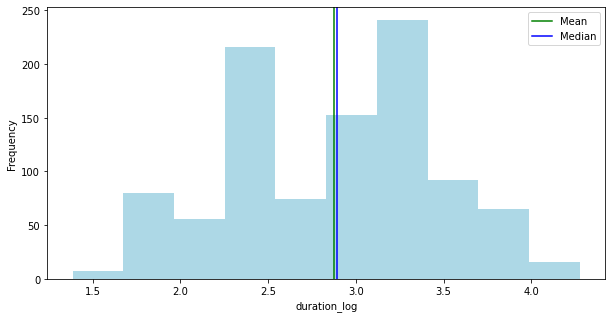

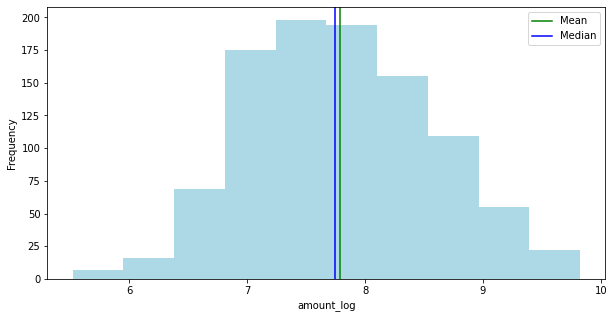

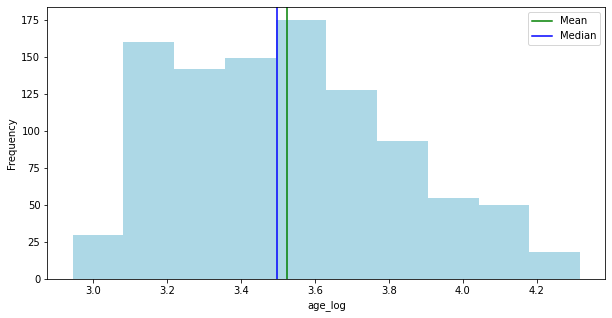

In [ ]:
for columns in  ['duration_log','amount_log','age_log']:
    mean_val = X[columns].mean()
    median_val = X[columns].median()
    mode_val = X[columns].mode()

    #print("{} Column statistics: Mean -> {}, Median -> {}, Mode -> {}".format(column, mean_val, median_val, mode_val))

    plt.figure(figsize=(10,5)) # set the figure size
    plt.hist(X[columns],color='lightblue') #Plot the histogram
    #df[column].plot(kind = "kde", color='lightblue')
    
    plt.axvline(mean_val, color='green',label='Mean')     # Draw lines on the plot for mean median mode
    plt.axvline(median_val, color='blue',label='Median')

    plt.xlabel(columns)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis
    plt.legend()              # Plot the legend
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

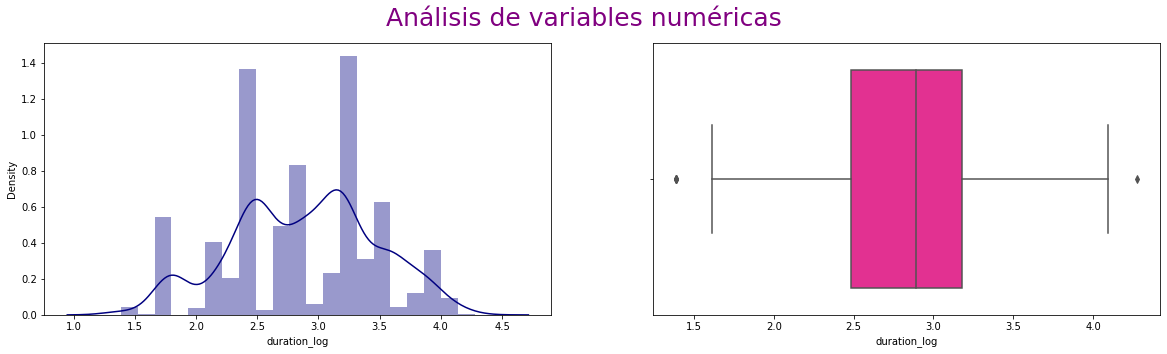

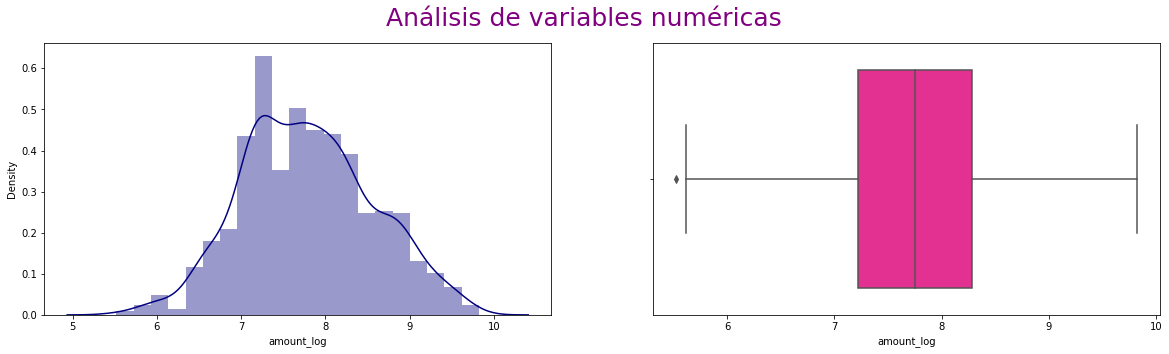

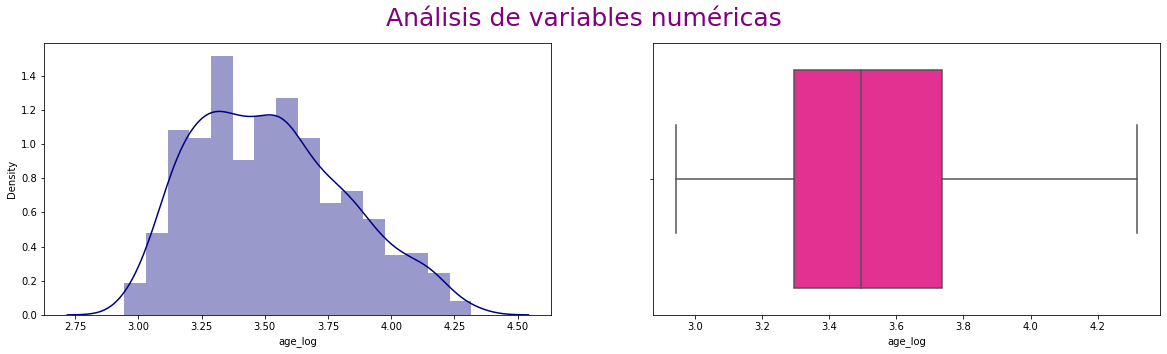

In [ ]:
# Variables numéricas
for columns in  ['duration_log','amount_log','age_log']:

    fig,ax=plt.subplots(1,2,figsize=(20,5))
    fig.suptitle('Análisis de variables numéricas', fontsize=25, color="purple")
    sns.distplot(X[columns],ax=ax[0], color="navy")
    sns.boxplot(X[columns],ax=ax[1], color="deeppink")

In [ ]:
colnlog = X[['duration_log','amount_log','age_log']]
colnlog.describe()

,duration_log,amount_log,age_log
count,1000.000000,1000.000000,1000.000000
mean,2.877018,7.788671,3.524374
std,0.582240,0.776510,0.299180
min,1.386294,5.521461,2.944439
25%,2.484907,7.219276,3.295837
50%,2.890372,7.749107,3.496508
75%,3.178054,8.287088,3.737670
max,4.276666,9.821409,4.317488


In [ ]:
no_sig = chiresult[chiresult['Result'] == 'Insignificant'].index
no_log = ['age', 'amount', 'duration']

In [ ]:
X.drop(no_sig, axis=1, inplace=True)
X.drop(no_log, axis=1, inplace=True)

In [ ]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,foreign_worker,amount_log,age_log,duration_log
status,1.00,0.16,0.05,-0.12,-0.11,-0.04,0.08,0.02,-0.07,0.01,-0.01,-0.00,-0.06,0.02
credit_history,0.16,1.00,0.09,-0.04,-0.14,-0.04,0.04,0.05,-0.16,-0.06,0.03,0.03,-0.16,0.07
purpose,0.05,0.09,1.00,-0.02,0.02,0.00,-0.02,0.01,-0.10,0.01,0.11,0.04,0.00,0.13
savings,-0.12,-0.04,-0.02,1.00,0.12,0.02,-0.11,0.02,0.00,0.01,-0.01,0.06,0.09,0.05
employment_duration,-0.11,-0.14,0.02,0.12,1.00,0.11,-0.01,0.09,-0.01,0.12,0.02,-0.01,0.28,0.05
personal_status_sex,-0.04,-0.04,0.00,0.02,0.11,1.00,0.05,-0.01,-0.03,0.10,-0.07,-0.03,0.02,0.01
other_debtors,0.08,0.04,-0.02,-0.11,-0.01,0.05,1.00,-0.16,-0.04,-0.07,-0.14,-0.03,-0.03,-0.02
property,0.02,0.05,0.01,0.02,0.09,-0.01,-0.16,1.00,-0.11,0.34,0.13,0.32,0.08,0.31
other_installment_plans,-0.07,-0.16,-0.10,0.00,-0.01,-0.03,-0.04,-0.11,1.00,-0.10,-0.01,-0.04,-0.04,-0.07
housing,0.01,-0.06,0.01,0.01,0.12,0.10,-0.07,0.34,-0.10,1.00,0.08,0.11,0.33,0.13


In [ ]:
X.drop(['age_log', 'duration_log', 'amount_log'], axis=1)

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,foreign_worker
0,1,0,2,1,1,2,1,2,3,1,2
1,1,0,0,1,2,3,1,1,3,1,2
2,2,2,9,2,3,2,1,1,3,1,2
3,1,0,0,1,2,3,1,1,3,1,1
4,1,0,0,1,2,3,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,1,2,3,1,1,3,1,2
996,1,2,0,1,4,3,2,1,3,2,2
997,0,0,0,5,4,3,1,4,3,3,2
998,2,2,3,5,0,3,1,4,3,2,2


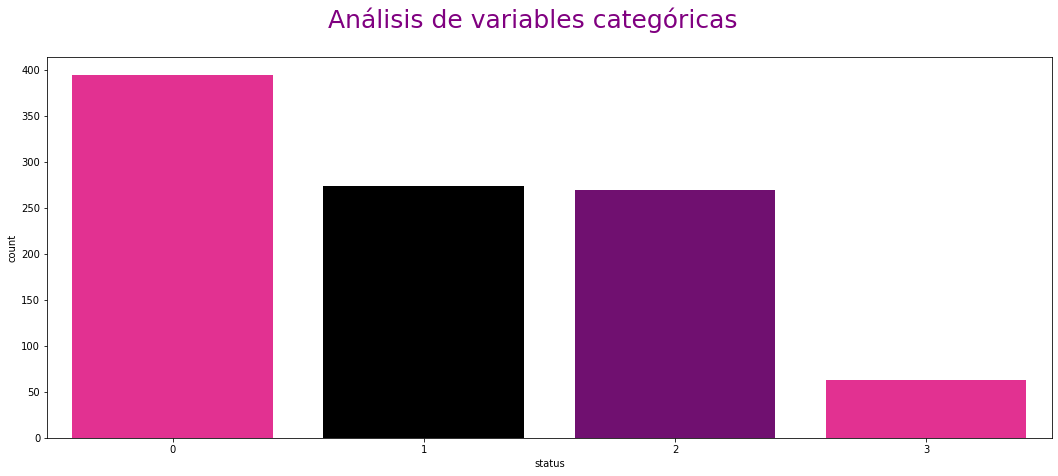

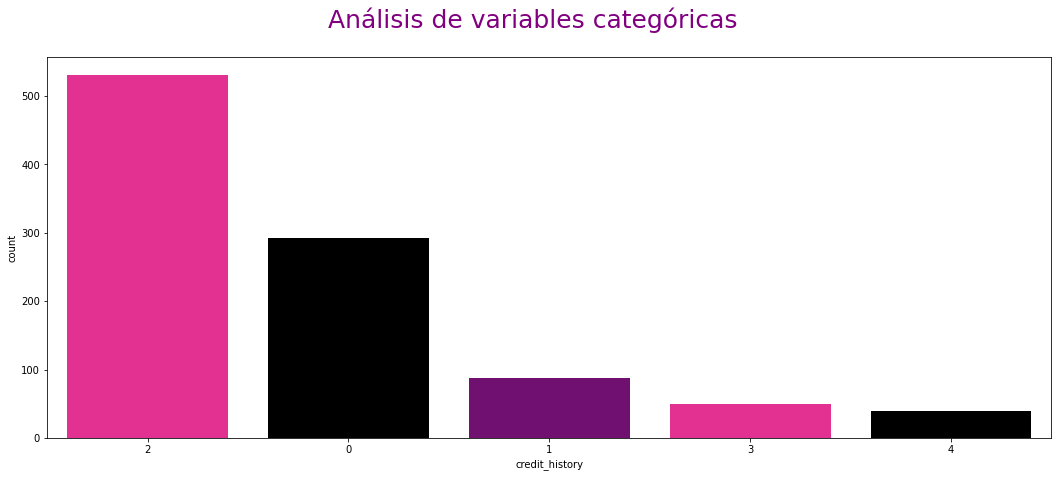

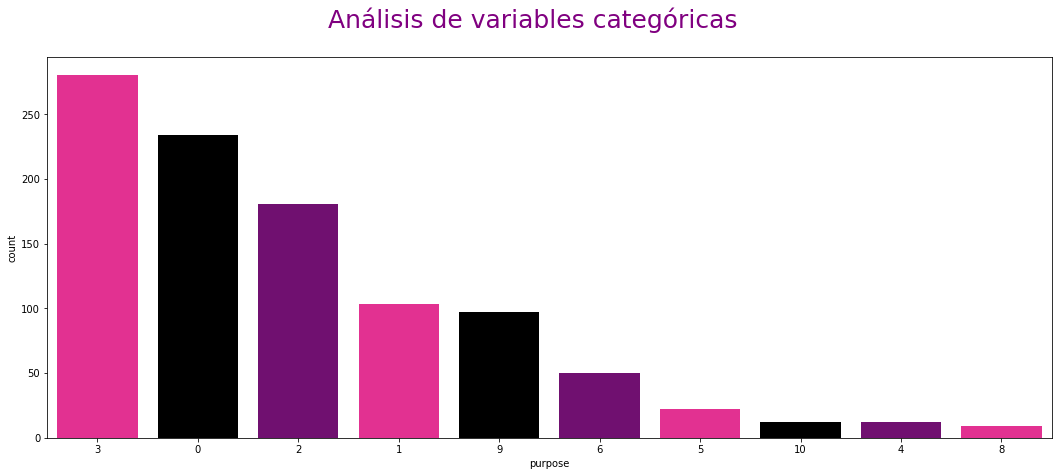

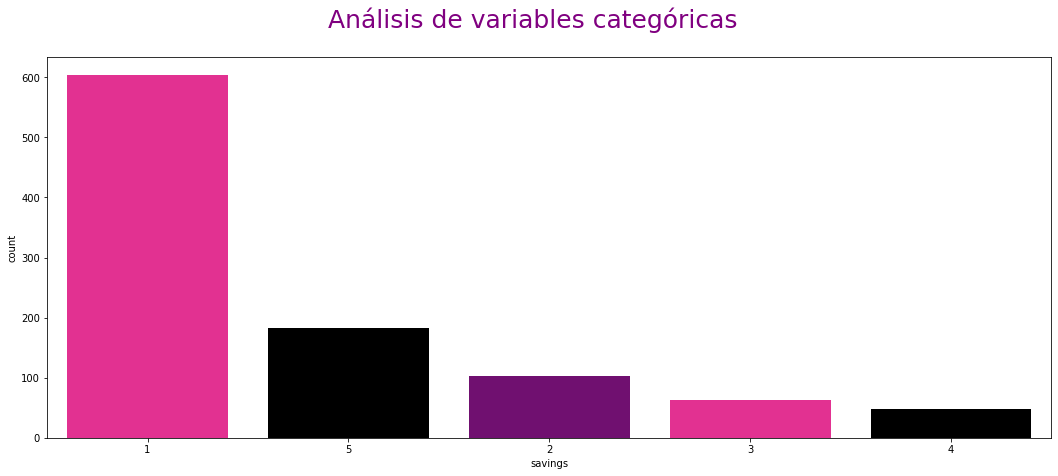

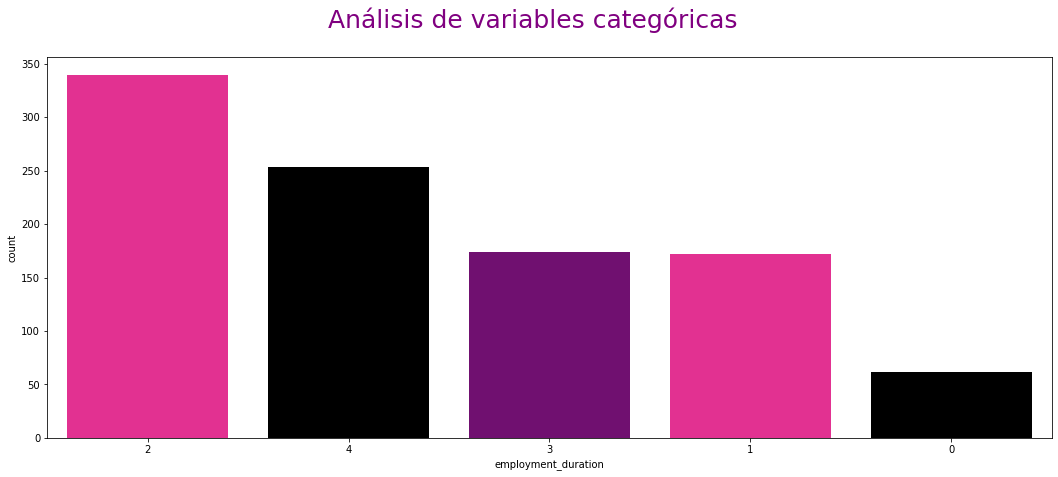

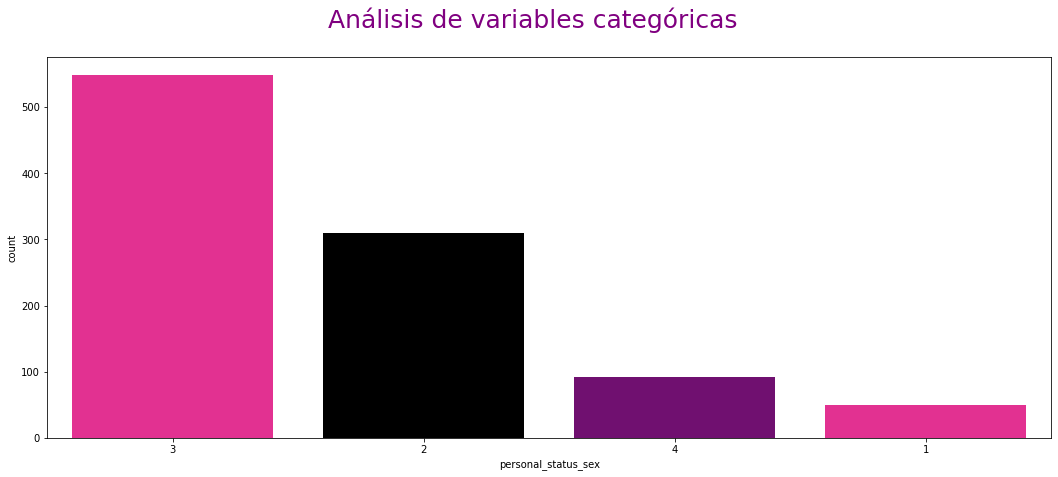

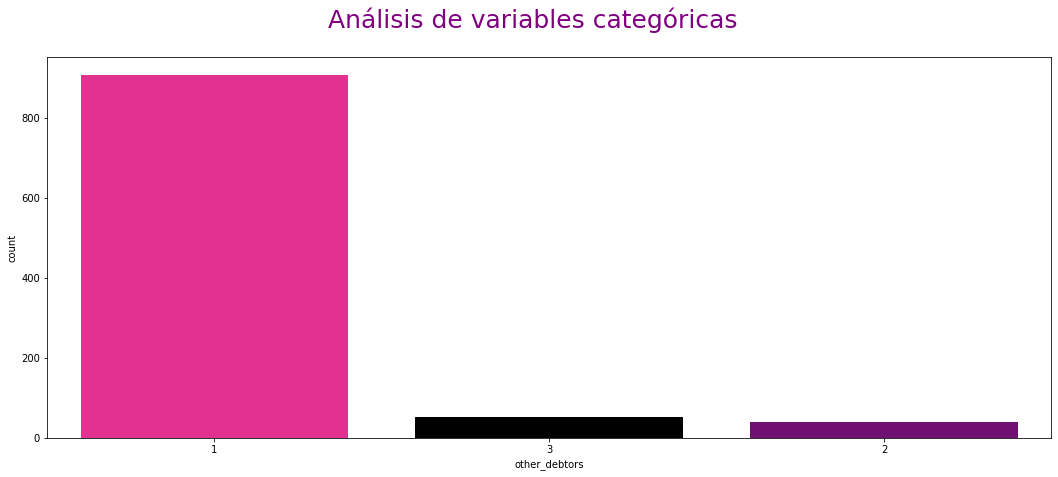

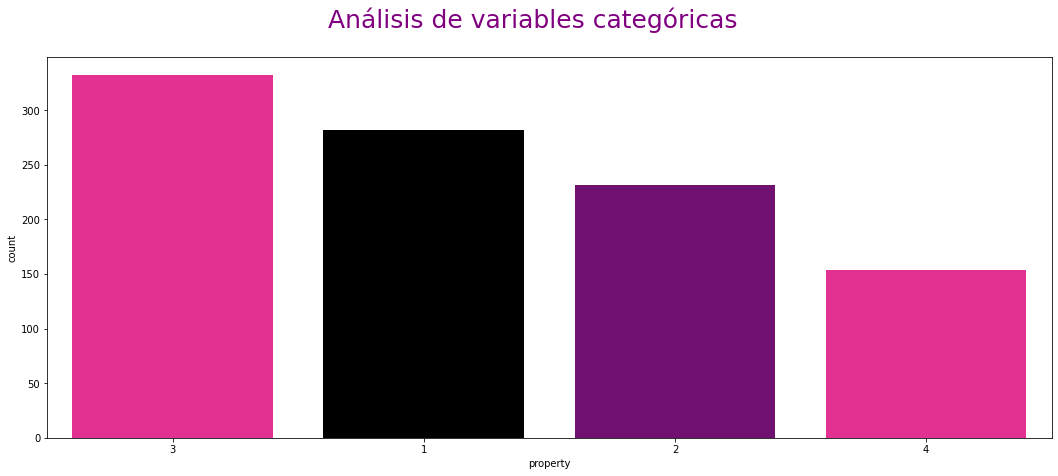

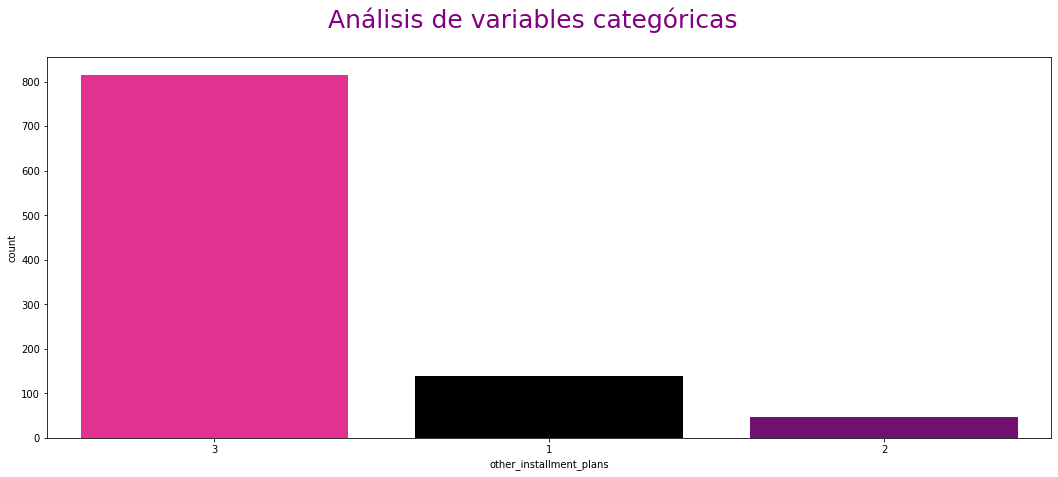

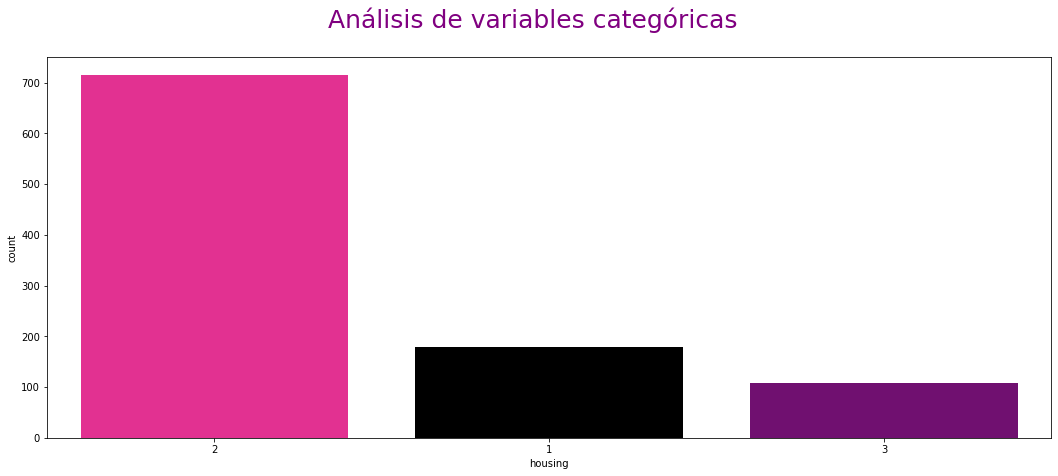

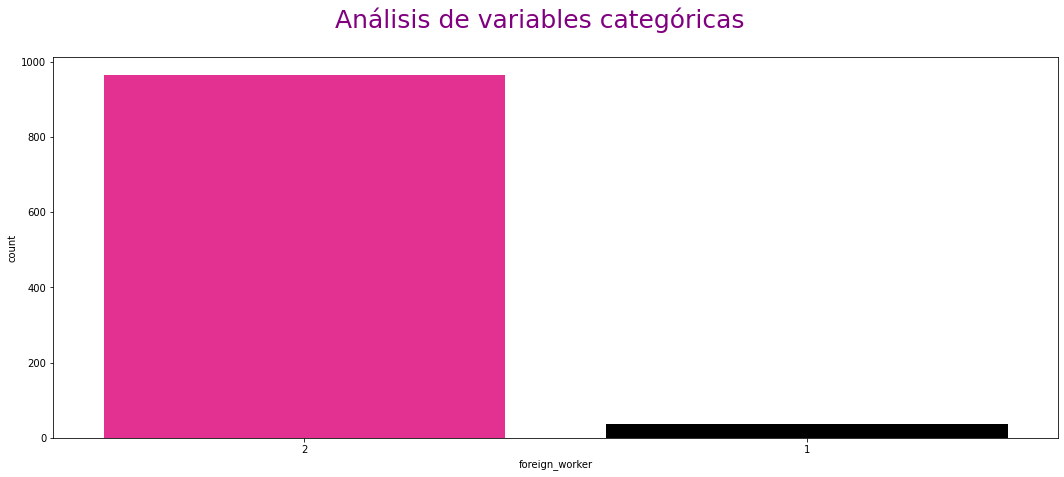

In [ ]:
from seaborn.palettes import color_palette
# Distribución de datos categóricas
for columns in X.drop(['age_log', 'amount_log', 'duration_log'], axis=1).columns:
    fig,ax=plt.subplots(figsize=(18,7))
    fig.suptitle('Análisis de variables categóricas', fontsize=25, color="purple")
    sns.countplot(x=columns, palette=["deeppink", "black","purple"],order=X[columns].value_counts().index, data=X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Entrenamiento de modelos

## Regresion Logistica


Accuracy para Logistic Regression Classifier :  0.7566666666666667
Presicion para el Logistic Regression Classifier :  0.8820754716981132
Recall para el Logistic Regression Classifier :  0.7957446808510639 

Recall para el Logistic Regression Classifier :  0.83668903803132 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


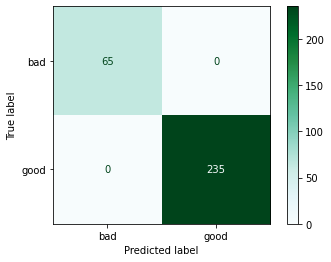


               precision    recall  f1-score   support

         bad     0.6154    0.4545    0.5229        88
        good     0.7957    0.8821    0.8367       212

    accuracy                         0.7567       300
   macro avg     0.7056    0.6683    0.6798       300
weighted avg     0.7428    0.7567    0.7446       300



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report

lgr = LogisticRegression()
lgr.fit (X_train,y_train)
ypred = lgr.predict(X_test)

lgr_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para Logistic Regression Classifier : ",lgr_acc)

lgr_pre = precision_score(ypred, y_test)
print('Presicion para el Logistic Regression Classifier : ', lgr_pre)

lgr_rcc = recall_score(ypred, y_test)
print('Recall para el Logistic Regression Classifier : ', lgr_rcc, '\n')

lgr_f1 = f1_score(ypred, y_test)
print('Recall para el Logistic Regression Classifier : ', lgr_f1, '\n')

plot_confusion_matrix(lgr, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.776


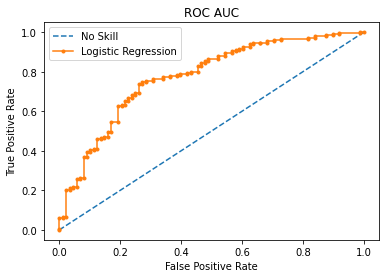

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lgr_probs = lgr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lgr_probs = lgr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lgr_auc = roc_auc_score(y_test, lgr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lgr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, lgr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lgr_fpr, lgr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

plt.title('ROC AUC')
# show the plot
pyplot.show()

# SVM


Accuracy para SVM Classifier :  0.7266666666666667
Presicion para el SVM Classifier :  1.0
Recall para el SVM Classifier :  0.7210884353741497
F1 para el SVM Classifier :  0.7210884353741497 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


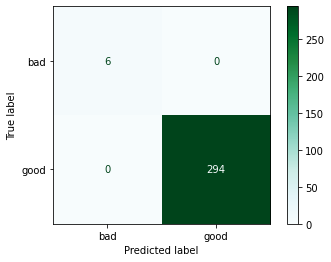


               precision    recall  f1-score   support

         bad     1.0000    0.0682    0.1277        88
        good     0.7211    1.0000    0.8379       212

    accuracy                         0.7267       300
   macro avg     0.8605    0.5341    0.4828       300
weighted avg     0.8029    0.7267    0.6296       300



In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)

svm_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para SVM Classifier : ",svm_acc)

svm_pre = precision_score(ypred, y_test)
print('Presicion para el SVM Classifier : ', svm_pre)

svm_rcc = recall_score(ypred, y_test)
print('Recall para el SVM Classifier : ', svm_rcc)

svm_f1 = f1_score(ypred, y_test)
print('F1 para el SVM Classifier : ', svm_rcc, '\n')

plot_confusion_matrix(svc, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

Recall:0.72109
Precision:1.00000


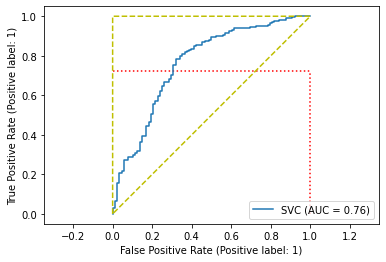

In [ ]:
print('Recall:%.5f' % svm_rcc)
print('Precision:%.5f' % svm_pre)
svm_curve = RocCurveDisplay.from_estimator(svc, X_test, y_test)
ROC_SVM =svm_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(svm_rcc, 0, svm_pre, colors='r', linestyles='dotted') 
plt.vlines(svm_pre, 0, svm_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

# KNN


Accuracy para KNN Classifier :  0.76
Presicion para el KNN Classifier :  0.9056603773584906
Recall para el KNN Classifier :  0.7868852459016393 

Recall para el KNN Classifier :  0.8421052631578947 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


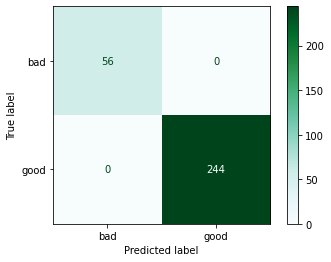


               precision    recall  f1-score   support

         bad     0.6429    0.4091    0.5000        88
        good     0.7869    0.9057    0.8421       212

    accuracy                         0.7600       300
   macro avg     0.7149    0.6574    0.6711       300
weighted avg     0.7446    0.7600    0.7418       300



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kc = KNeighborsClassifier()
kc.fit(X_train, y_train)
ypred = kc.predict(X_test)

kc_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para KNN Classifier : ",kc_acc)

kc_pre = precision_score(ypred, y_test)
print('Presicion para el KNN Classifier : ', kc_pre)

kc_rcc = recall_score(ypred, y_test)
print('Recall para el KNN Classifier : ', kc_rcc, '\n')

kc_f1 = f1_score(ypred, y_test)
print('Recall para el KNN Classifier : ', kc_f1, '\n')

plot_confusion_matrix(kc, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

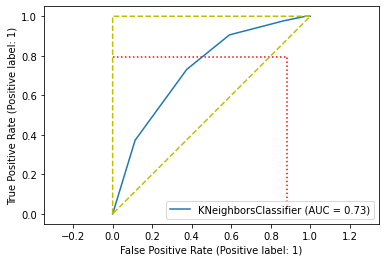

In [ ]:
knn_curve = RocCurveDisplay.from_estimator(kc, X_test, y_test)
ROC_KNN = knn_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(lgr_rcc, 0, lgr_pre, colors='r', linestyles='dotted') 
plt.vlines(lgr_pre, 0, lgr_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

# Decision Tree


Accuracy para DT Classifier :  0.6866666666666666
Presicion para el DT Classifier :  0.7641509433962265
Recall para el DT Classifier :  0.7864077669902912 

F1 para el DT Classifier :  0.7751196172248804 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


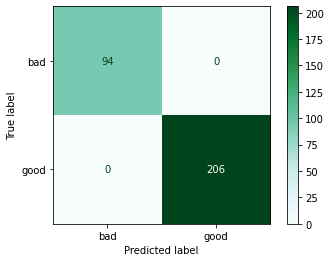


               precision    recall  f1-score   support

         bad     0.4681    0.5000    0.4835        88
        good     0.7864    0.7642    0.7751       212

    accuracy                         0.6867       300
   macro avg     0.6272    0.6321    0.6293       300
weighted avg     0.6930    0.6867    0.6896       300



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini', random_state=0)  
dtc.fit(X_train,y_train)
ypred = dtc.predict(X_test)

dt_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para DT Classifier : ",dt_acc)

dt_pre = precision_score(ypred, y_test)
print('Presicion para el DT Classifier : ', dt_pre)

dt_rcc = recall_score(ypred, y_test)
print('Recall para el DT Classifier : ', dt_rcc, '\n')

dt_f1 = f1_score(ypred, y_test)
print('F1 para el DT Classifier : ', dt_f1, '\n')

plot_confusion_matrix(dtc, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

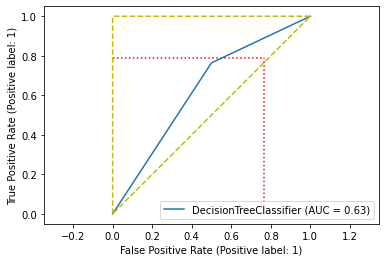

In [ ]:
dt_curve = RocCurveDisplay.from_estimator(dtc, X_test, y_test)
ROC_DT =dt_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(dt_rcc, 0, dt_pre, colors='r', linestyles='dotted') 
plt.vlines(dt_pre, 0, dt_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

# Random forest


Accuracy para RF Classifier :  0.7833333333333333
Presicion para el RF Classifier :  0.9198113207547169
Recall para el RF Classifier :  0.8024691358024691 

F1 para el RF Classifier :  0.8024691358024691 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


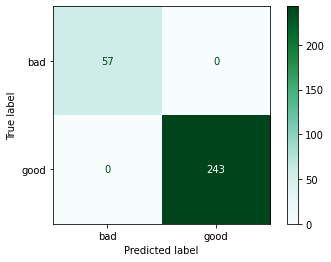


               precision    recall  f1-score   support

         bad     0.7018    0.4545    0.5517        88
        good     0.8025    0.9198    0.8571       212

    accuracy                         0.7833       300
   macro avg     0.7521    0.6872    0.7044       300
weighted avg     0.7729    0.7833    0.7676       300



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)


rf_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para RF Classifier : ",rf_acc)

rf_pre = precision_score(ypred, y_test)
print('Presicion para el RF Classifier : ', rf_pre)

rf_rcc = recall_score(ypred, y_test)
print('Recall para el RF Classifier : ', rf_rcc, '\n')

rf_f1 = f1_score(ypred, y_test)
print('F1 para el RF Classifier : ', rf_rcc, '\n')

plot_confusion_matrix(rfc, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

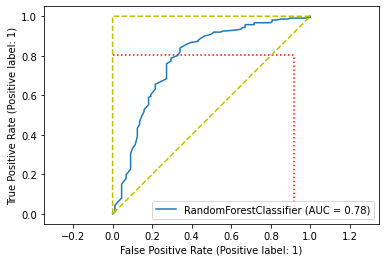

In [ ]:
rf_curve = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
ROC_RF =rf_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(rf_rcc, 0, rf_pre, colors='r', linestyles='dotted') 
plt.vlines(rf_pre, 0, rf_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

# MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy para MLP Classifier :  0.7766666666666666
Presicion para el MLP Classifier :  0.8490566037735849
Recall para el MLP Classifier :  0.8372093023255814 

F1 para el MLP Classifier :  0.8430913348946135 



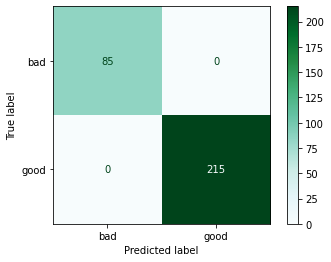


               precision    recall  f1-score   support

         bad     0.6235    0.6023    0.6127        88
        good     0.8372    0.8491    0.8431       212

    accuracy                         0.7767       300
   macro avg     0.7304    0.7257    0.7279       300
weighted avg     0.7745    0.7767    0.7755       300



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
ypred = mlp.predict(X_test)


mlp_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para MLP Classifier : ",mlp_acc)

mlp_pre = precision_score(ypred, y_test)
print('Presicion para el MLP Classifier : ', mlp_pre)

mlp_rcc = recall_score(ypred, y_test)
print('Recall para el MLP Classifier : ', mlp_rcc, '\n')

mlp_f1 = f1_score(ypred, y_test)
print('F1 para el MLP Classifier : ', mlp_f1, '\n')

plot_confusion_matrix(mlp, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

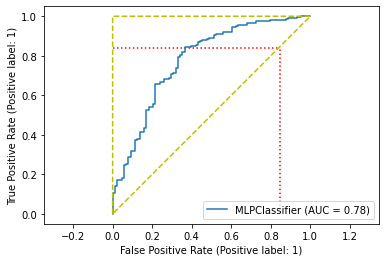

In [ ]:
mlp_curve = RocCurveDisplay.from_estimator(mlp, X_test, y_test)
ROC_MLP = mlp_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(mlp_rcc, 0, mlp_pre, colors='r', linestyles='dotted') 
plt.vlines(mlp_pre, 0, mlp_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show()

In [ ]:
# Consolidamos los resultados de los test en un data frame

data= [['KNN-test',kc_acc,kc_rcc,kc_pre,kc_f1, ROC_KNN],
       ['LR-test',lgr_acc,lgr_rcc,lgr_pre,lgr_f1, lgr_auc],
       ['MLP-test',mlp_acc,mlp_rcc,mlp_pre,mlp_f1, ROC_MLP],
       ['SVM-test',svm_acc,svm_rcc,svm_pre,svm_f1, ROC_SVM],
       ['DT-test',dt_acc,dt_rcc,dt_pre,dt_f1, ROC_DT],
       ['RF-test',rf_acc,rf_rcc,rf_pre,rf_f1, ROC_RF]]


columns = ['Modelo','Accuracy', 'Recall', 'Precision' ,'F1-score','AUC']
dfResults = pd.DataFrame(data,columns=columns)

dfResults

,Modelo,Accuracy,Recall,Precision,F1-score,AUC
0,KNN-test,0.760000,0.786885,0.905660,0.842105,0.733785
1,LR-test,0.756667,0.795745,0.882075,0.836689,0.776104
2,MLP-test,0.776667,0.837209,0.849057,0.843091,0.777498
3,SVM-test,0.726667,0.721088,1.000000,0.837945,0.763025
4,DT-test,0.686667,0.786408,0.764151,0.775120,0.632075
5,RF-test,0.783333,0.802469,0.919811,0.857143,0.783367


In [ ]:
num_folds = 10
seed = 7

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('MLP',MLPClassifier()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier()))

In [ ]:
results = []
names1 = []
scoring = {'Accuracy': 'accuracy','Precision': 'precision', 'Recall':'recall', 'F1 Score':'f1','ROC':'roc_auc'}


for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results1 = cross_validate(model, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
  dfval = {'Modelo': name+'-validation', 'Accuracy': cv_results1['test_Accuracy'].mean(), 
                                        'Recall':cv_results1['test_Recall'].mean() ,
                                        'Precision':cv_results1['test_Precision'].mean(), 
                                        'F1-score':cv_results1['test_F1 Score'].mean(),
                                        'AUC':cv_results1['test_ROC'].mean() }
  dfResults = dfResults.append(dfval,ignore_index=True)
                                        
  results.append(np.array(cv_results1['test_Accuracy']))
  names1.append('Acc '+ name)
  results.append(np.array(cv_results1['test_F1 Score']))
  names1.append('F1 '+ name )
  results.append(np.array(cv_results1['test_Precision']))
  names1.append('Prec ' + name)
  results.append(np.array(cv_results1['test_ROC']))
  names1.append('ROC ' + name)
  results.append(np.array(cv_results1['test_Recall']))
  names1.append('Rec '+ name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
dfResults.sort_values('AUC', ascending=False)

,Modelo,Accuracy,Recall,Precision,F1-score,AUC
11,RF-validation,0.744286,0.882864,0.780642,0.826680,0.790233
5,RF-test,0.783333,0.802469,0.919811,0.857143,0.783367
2,MLP-test,0.776667,0.837209,0.849057,0.843091,0.777498
1,LR-test,0.756667,0.795745,0.882075,0.836689,0.776104
3,SVM-test,0.726667,0.721088,1.000000,0.837945,0.763025
8,MLP-validation,0.731429,0.881294,0.767610,0.819026,0.741441
0,KNN-test,0.760000,0.786885,0.905660,0.842105,0.733785
7,LR-validation,0.725714,0.889311,0.758995,0.817481,0.733148
9,SVM-validation,0.691429,0.976450,0.700322,0.813964,0.731928
6,KNN-validation,0.707143,0.876068,0.747151,0.805230,0.675272


{'boxes': [<matplotlib.lines.Line2D at 0x7f22668af4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22667230d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2266539210>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2266723a10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22661e9f90>,
  <matplotlib.lines.Line2D at 0x7f22660d7210>]}

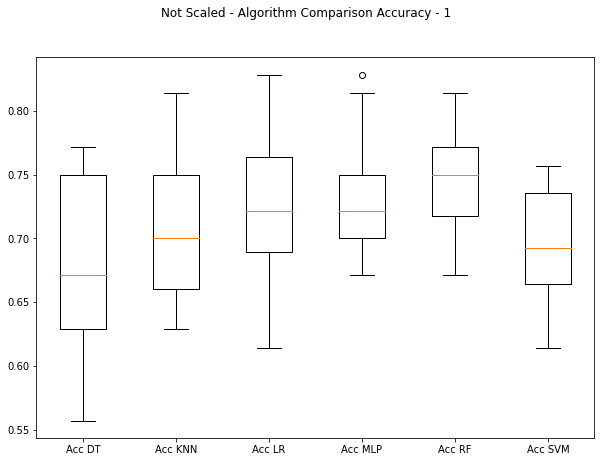

In [ ]:
new_x, new_y = zip(*sorted(zip(names1, results)))
fig = plt.figure(figsize =(10, 7))
fig.suptitle('Not Scaled - Algorithm Comparison Accuracy - 1')
plt.boxplot(new_y[0:6], labels= new_x[0:6])

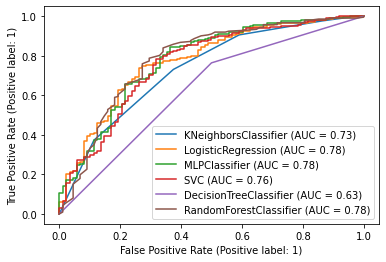

<Figure size 4320x2880 with 0 Axes>

In [ ]:
# Gráfica de AUC para los 6 modelos
knn_curve = RocCurveDisplay.from_estimator(kc, X_test, y_test)
lr_curve = RocCurveDisplay.from_estimator(lgr, X_test, y_test, ax=knn_curve.ax_)
mlp_curve = RocCurveDisplay.from_estimator(mlp, X_test, y_test,ax=lr_curve.ax_)
svm_curve = RocCurveDisplay.from_estimator(svc, X_test, y_test,ax=mlp_curve.ax_)
dt_curve = RocCurveDisplay.from_estimator(dtc, X_test, y_test,ax=svm_curve.ax_)
rf_curve = RocCurveDisplay.from_estimator(rfc, X_test, y_test,ax=dt_curve.ax_)
fig = plt.figure(figsize =(60, 40))
#plt.plot([0,0,1,0],[0,1,1,0], 'y--')
#plt.axis('equal')

# Import imblearn

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('No sampled data set', X_train.shape, y_train.shape)
print('Resampled dataset shape %s', X_res.shape, y_res.shape)

No sampled data set (700, 14) (700,)
Resampled dataset shape %s (976, 14) (976,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


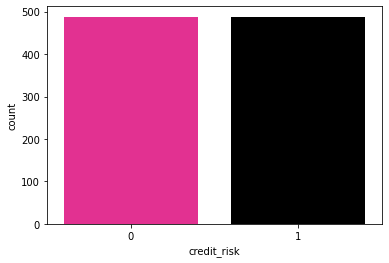

In [ ]:
sns.countplot(y_res, palette=['deeppink','black'])

In [ ]:
X_res

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,foreign_worker,amount_log,age_log,duration_log
0,2,2,3,1,1,4,1,2,3,2,2,7.620215,3.091042,3.178054
1,0,0,1,5,0,3,1,4,3,2,2,8.079928,3.637586,2.890372
2,0,0,6,5,2,2,1,3,3,2,2,7.563720,3.496508,3.178054
3,3,2,0,1,1,3,3,2,3,2,2,8.281218,3.610918,2.302585
4,0,2,0,1,2,3,1,1,3,2,1,7.343426,3.433987,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,1,2,1,0,1,1,2,3,2,2,7.761715,3.497464,3.178054
972,2,2,0,2,1,2,1,2,3,1,2,8.285284,3.302458,3.178054
973,2,2,2,5,2,3,1,1,3,2,2,7.431822,3.218876,2.484907
974,1,2,2,1,0,1,1,2,3,2,2,7.332295,3.496508,3.008334



Accuracy para RF Classifier :  0.7566666666666667
Presicion para el RF Classifier :  0.8254716981132075
Recall para el RF Classifier :  0.8293838862559242 

F1 para el RF Classifier :  0.8293838862559242 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


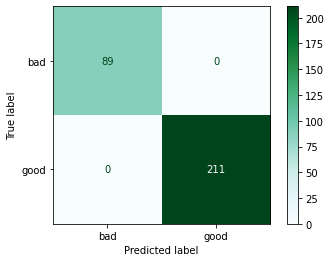


               precision    recall  f1-score   support

         bad     0.5843    0.5909    0.5876        88
        good     0.8294    0.8255    0.8274       212

    accuracy                         0.7567       300
   macro avg     0.7068    0.7082    0.7075       300
weighted avg     0.7575    0.7567    0.7571       300



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res,y_res)
ypred = rfc.predict(X_test)


rf_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para RF Classifier : ",rf_acc)

rf_pre = precision_score(ypred, y_test)
print('Presicion para el RF Classifier : ', rf_pre)

rf_rcc = recall_score(ypred, y_test)
print('Recall para el RF Classifier : ', rf_rcc, '\n')

rf_f1 = f1_score(ypred, y_test)
print('F1 para el RF Classifier : ', rf_rcc, '\n')

plot_confusion_matrix(rfc, X_test, ypred, cmap='BuGn', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

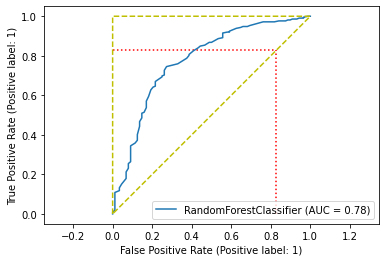

In [ ]:
rf_curve = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
ROC_RF =rf_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(rf_rcc, 0, rf_pre, colors='r', linestyles='dotted') 
plt.vlines(rf_pre, 0, rf_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

Aplicar el SMOTE al X completo

No sampled data set (700, 14) (700,)
Resampled dataset shape %s (976, 14) (976,)

Accuracy para RF Classifier :  0.78
Presicion para el RF Classifier :  0.8820754716981132
Recall para el RF Classifier :  0.8201754385964912 

F1 para el RF Classifier :  0.85 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


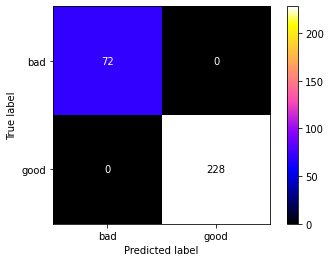


               precision    recall  f1-score   support

         bad     0.6528    0.5341    0.5875        88
        good     0.8202    0.8821    0.8500       212

    accuracy                         0.7800       300
   macro avg     0.7365    0.7081    0.7188       300
weighted avg     0.7711    0.7800    0.7730       300



In [ ]:
from imblearn.over_sampling import RandomOverSampler 

sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('No sampled data set', X_train.shape, y_train.shape)
print('Resampled dataset shape %s', X_res.shape, y_res.shape)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res,y_res)
ypred = rfc.predict(X_test)


rf_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para RF Classifier : ",rf_acc)

rf_pre = precision_score(ypred, y_test)
print('Presicion para el RF Classifier : ', rf_pre)

rf_rcc = recall_score(ypred, y_test)
print('Recall para el RF Classifier : ', rf_rcc, '\n')

rf_f1 = f1_score(ypred, y_test)
print('F1 para el RF Classifier : ', rf_f1, '\n')

plot_confusion_matrix(rfc, X_test, ypred, cmap='gnuplot2', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

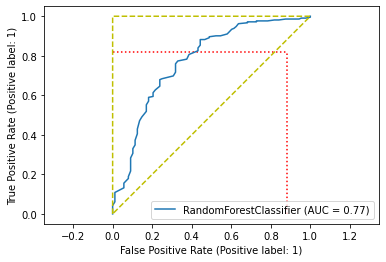

In [ ]:
rf_curve = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
ROC_RF =rf_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(rf_rcc, 0, rf_pre, colors='r', linestyles='dotted') 
plt.vlines(rf_pre, 0, rf_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

No sampled data set (700, 14) (700,)
Resampled dataset shape %s (976, 14) (976,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy para MLP Classifier :  0.7
Presicion para el MLP Classifier :  0.6981132075471698
Recall para el MLP Classifier :  0.8505747126436781
F1 para el MLP Classifier :  0.8505747126436781 



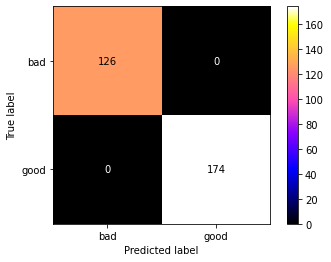


               precision    recall  f1-score   support

         bad     0.4921    0.7045    0.5794        88
        good     0.8506    0.6981    0.7668       212

    accuracy                         0.7000       300
   macro avg     0.6713    0.7013    0.6731       300
weighted avg     0.7454    0.7000    0.7119       300



In [ ]:
from imblearn.over_sampling import RandomOverSampler 

sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('No sampled data set', X_train.shape, y_train.shape)
print('Resampled dataset shape %s', X_res.shape, y_res.shape)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_res,y_res)
ypred = mlp.predict(X_test)


mlp_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para MLP Classifier : ",mlp_acc)

mlp_pre = precision_score(ypred, y_test)
print('Presicion para el MLP Classifier : ', mlp_pre)

mlp_rcc = recall_score(ypred, y_test)
print('Recall para el MLP Classifier : ', mlp_rcc)

mlp_f1 = f1_score(ypred, y_test)
print('F1 para el MLP Classifier : ', mlp_rcc, '\n')

plot_confusion_matrix(mlp, X_test, ypred, cmap='gnuplot2', colorbar="pink",display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

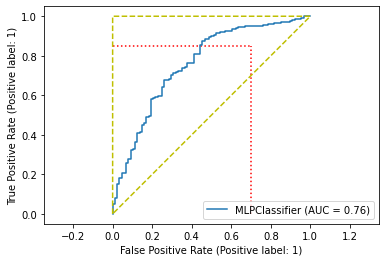

In [ ]:
mlp_curve = RocCurveDisplay.from_estimator(mlp, X_test, y_test)
ROC_MLP =mlp_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(mlp_rcc, 0, mlp_pre, colors='r', linestyles='dotted') 
plt.vlines(mlp_pre, 0, mlp_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

No sampled data set (700, 14) (700,)
Resampled dataset shape %s (976, 14) (976,)

Accuracy para KNN Classifier :  0.6566666666666666
Presicion para el KNN Classifier :  0.6886792452830188
Recall para el KNN Classifier :  0.7978142076502732 

F1 para el KNN Classifier :  0.7392405063291139 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


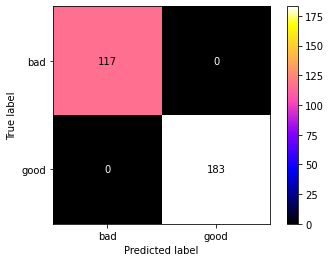


               precision    recall  f1-score   support

         bad     0.4359    0.5795    0.4976        88
        good     0.7978    0.6887    0.7392       212

    accuracy                         0.6567       300
   macro avg     0.6169    0.6341    0.6184       300
weighted avg     0.6917    0.6567    0.6683       300



In [ ]:
from imblearn.over_sampling import RandomOverSampler 

sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('No sampled data set', X_train.shape, y_train.shape)
print('Resampled dataset shape %s', X_res.shape, y_res.shape)

from sklearn.neighbors import KNeighborsClassifier

kc = KNeighborsClassifier()
kc.fit(X_res, y_res)
ypred = kc.predict(X_test)

kc_acc = accuracy_score(ypred, y_test)
print("\nAccuracy para KNN Classifier : ",kc_acc)

kc_pre = precision_score(ypred, y_test)
print('Presicion para el KNN Classifier : ', kc_pre)

kc_rcc = recall_score(ypred, y_test)
print('Recall para el KNN Classifier : ', kc_rcc, '\n')

kc_f1 = f1_score(ypred, y_test)
print('F1 para el KNN Classifier : ', kc_f1, '\n')

plot_confusion_matrix(kc, X_test, ypred, cmap='gnuplot2', display_labels=['bad', 'good'])
plt.show()

repo = classification_report(y_test, ypred, target_names=['bad', 'good'], digits=4)
print('\n', repo)

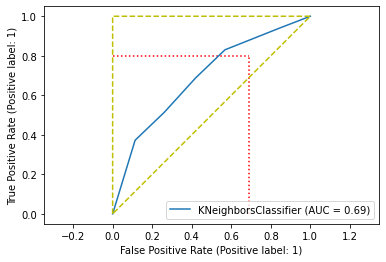

In [ ]:
kc_curve = RocCurveDisplay.from_estimator(kc, X_test, y_test)
ROC_KC =kc_curve.roc_auc
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(kc_rcc, 0, kc_pre, colors='r', linestyles='dotted') 
plt.vlines(kc_pre, 0, kc_rcc, colors='r', linestyles='dotted') 
plt.axis('equal')
plt.show() 

In [ ]:
# Consolidamos los resultados de los test en un data frame

data2= [['MLP-test',mlp_acc,mlp_rcc,mlp_pre,mlp_f1, ROC_MLP],
       ['RF-test',rf_acc,rf_rcc,rf_pre,rf_f1, ROC_RF]]


columns = ['Modelo','Accuracy', 'Recall', 'Precision' ,'F1-score','AUC']
dfResults = pd.DataFrame(data2,columns=columns)

dfResults

,Modelo,Accuracy,Recall,Precision,F1-score,AUC
0,MLP-test,0.70,0.850575,0.698113,0.766839,0.761096
1,RF-test,0.78,0.820175,0.882075,0.850000,0.773665


In [ ]:
num_folds = 5
seed = 5
models1 = []

models1.append(('MLP',MLPClassifier()))
models1.append(('RF',  RandomForestClassifier()))

In [ ]:
results1 = []
names1 = []
scoring = {'Accuracy': 'accuracy','Precision': 'precision', 'Recall':'recall', 'F1 Score':'f1','ROC':'roc_auc'}


for name, model1 in models1:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results1 = cross_validate(model, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
  dfval = {'Modelo': name+'-validation', 'Accuracy': cv_results1['test_Accuracy'].mean(), 
                                        'Recall':cv_results1['test_Recall'].mean() ,
                                        'Precision':cv_results1['test_Precision'].mean(), 
                                        'F1-score':cv_results1['test_F1 Score'].mean(),
                                        'AUC':cv_results1['test_ROC'].mean() }
  dfResults = dfResults.append(dfval,ignore_index=True)
                                        
  results1.append(np.array(cv_results1['test_Accuracy']))
  names1.append('Acc '+ name)
  results1.append(np.array(cv_results1['test_F1 Score']))
  names1.append('F1 '+ name )
  results1.append(np.array(cv_results1['test_Precision']))
  names1.append('Prec ' + name)
  results1.append(np.array(cv_results1['test_ROC']))
  names1.append('ROC ' + name)
  results1.append(np.array(cv_results1['test_Recall']))
  names1.append('Rec '+ name)

In [ ]:
dfResults

,Modelo,Accuracy,Recall,Precision,F1-score,AUC
0,MLP-test,0.700000,0.850575,0.698113,0.766839,0.761096
1,RF-test,0.780000,0.820175,0.882075,0.850000,0.773665
2,MLP-validation,0.748571,0.882136,0.786385,0.829558,0.791135
3,RF-validation,0.727143,0.861987,0.775156,0.814124,0.784419


In [ ]:

dfResults.groupby(["Modelo"]).agg(["max"])

,Accuracy,Recall,Precision,F1-score,AUC
,max,max,max,max,max
Modelo,,,,,
MLP-test,0.700000,0.850575,0.698113,0.766839,0.761096
MLP-validation,0.748571,0.882136,0.786385,0.829558,0.791135
RF-test,0.780000,0.820175,0.882075,0.850000,0.773665
RF-validation,0.727143,0.861987,0.775156,0.814124,0.784419
